In [80]:
#%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:

df = pkl.load( open ('/users/global/cornkle/C_paper/wavelet/saves/bulk_10big.p', 'rb'))
df.keys()

dict_keys(['month', 'latisfin', 'pmax', 'po30', 'tmean', 'tmin', 'lat30', 'isfin', 't', 'clat', 'lon30', 'hour', 'area', 'lonisfin', 'pperc', 'ao60'])

In [105]:
dic = {}
for i in df.keys():
    if (len(df[i])) == 22346:
        dic[i] = df[i]

In [106]:
pdf = pd.DataFrame(dic)

In [83]:

hours = np.array(df['hour'])

In [84]:
diurn = np.unique(hours)

In [85]:
np.sum(np.array(df['hour'])==0)

747

In [130]:
pprob = []
pfin = []
p30 = []
hh = []
aarea = []
tmin=[]
ib = []
for h in diurn:
    
    po30 = np.sum(np.array(df['po30'])[(hours==h)])
    fin = np.sum(np.array(df['isfin'])[(hours==h)])
    aa = np.mean(np.array(df['area'])[(hours==h) ])
    tmi = np.mean(np.array(df['tmin'])[(hours==h) ])
    isbigger = np.sum(np.array(df['pmax'])[(hours==h)]>30)
    hourss = np.sum(hours==h)
    
    prob = po30/fin
    pprob.append(prob)
    p30.append(po30)
    pfin.append(fin)
    hh.append(hourss)
    aarea.append(aa*25)
    tmin.append(tmi)
    ib.append(isbigger)

Even for the whole MCS bulk approach, there is no max probability for extreme rain in the afternoon:

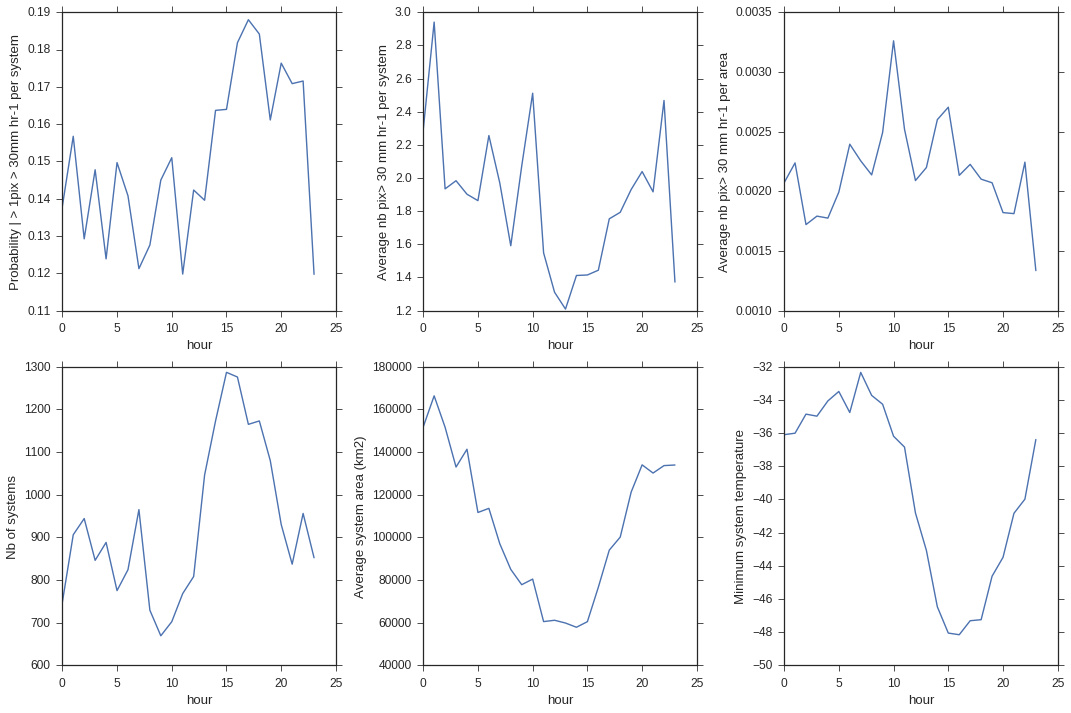

In [147]:
f = plt.figure(figsize=(15, 10))
ax = ax = f.add_subplot(231)
plt.plot(diurn, np.array(ib)/hh)
plt.xlabel('hour')
plt.ylabel('Probability | > 1pix > 30mm hr-1 per system')  # dominated by system frequency
ax = ax = f.add_subplot(232)
plt.plot(diurn, np.array(p30)/np.array(hh))
plt.xlabel('hour')
plt.ylabel('Average nb pix> 30 mm hr-1 per system')  # dominated by system area
ax = ax = f.add_subplot(233)
plt.plot(diurn, np.array(p30)/np.array(pfin))
plt.xlabel('hour')
plt.ylabel('Average nb pix> 30 mm hr-1 per area') # frequency of extreme rain with respect to area
plt.tight_layout()
ax = ax = f.add_subplot(234)
plt.plot(diurn, np.array(hh))
plt.xlabel('hour')
plt.ylabel('Nb of systems')  # dominated by system frequency
ax = ax = f.add_subplot(235)
plt.plot(diurn, np.array(aarea))
plt.xlabel('hour')
plt.ylabel('Average system area (km2)')  # dominated by system area
ax = ax = f.add_subplot(236)
plt.plot(diurn, np.array(tmin))
plt.xlabel('hour')
plt.ylabel('Minimum system temperature') # frequency of extreme rain with respect to area
plt.tight_layout()

In [140]:
print(hourss)
print(fin)

852
875586


In [110]:
plt.plot(diurn, hgroup['isfin'].sum
plt.xlabel('hour')
plt.ylabel('nb valid pixel')

SyntaxError: invalid syntax (<ipython-input-110-8d6bbc4b1aad>, line 2)

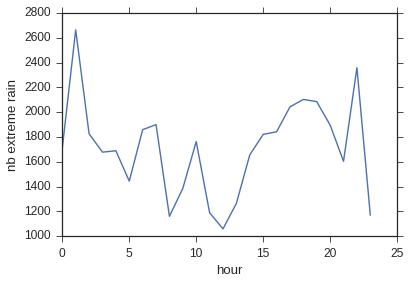

In [89]:
plt.plot(diurn, p30)
plt.xlabel('hour')
plt.ylabel('nb extreme rain')

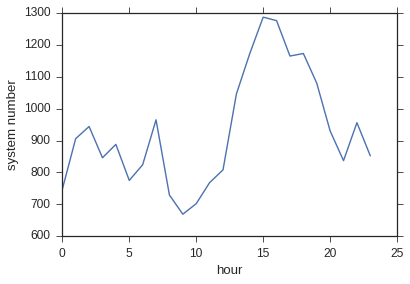

In [90]:
plt.plot(diurn, hh)
plt.xlabel('hour')
plt.ylabel('system number')

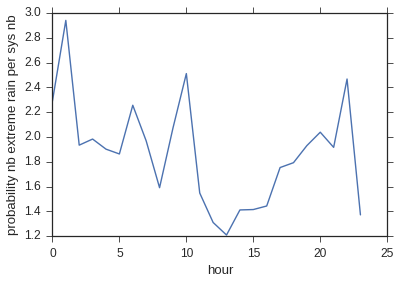

In [93]:
plt.plot(diurn, np.array(p30)/np.array(hh))
plt.xlabel('hour')
plt.ylabel('probability nb extreme rain per sys nb')

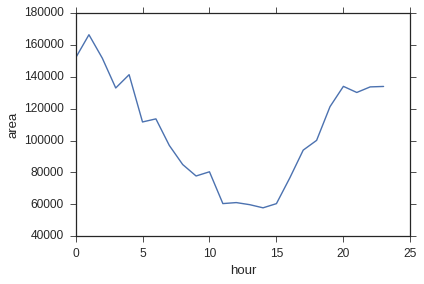

In [94]:
plt.plot(diurn, aarea)
plt.xlabel('hour')
plt.ylabel('area')